In [736]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [737]:
df = pd.read_csv('./train.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [738]:
def distribution_plot(df, feature):
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.show()

In [739]:
df = df.dropna(how='all').copy()
df.isnull().sum()

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   501
LoanAmount                    501
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           501
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             501
LoanPurpose                   501
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        501
TotalAssets                   501
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [740]:
df.drop('ApplicationDate', axis=1, inplace=True)

In [741]:
df.select_dtypes(include=['object']).isnull().sum()

MaritalStatus            0
HomeOwnershipStatus      0
LoanPurpose            501
EmploymentStatus         0
EducationLevel           0
dtype: int64

In [742]:
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df.select_dtypes(include=['object'])

,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
0,Divorced,Rent,Education,Employed,Associate
1,Widowed,Mortgage,Home,Employed,High School
2,Married,Mortgage,Education,Employed,Bachelor
3,Married,Other,Debt Consolidation,Employed,High School
4,Single,Rent,Debt Consolidation,Employed,Bachelor
...,...,...,...,...,...
11011,Divorced,Own,Home,Employed,Associate
11012,Married,Own,Education,Employed,Associate
11013,Single,Own,Home,Employed,Bachelor
11014,Married,Rent,Education,Self-Employed,Associate


In [743]:
df.select_dtypes(include=['object']).isnull().sum()

MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

In [744]:
from sklearn.impute import KNNImputer

columns_with_missing_data = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer(n_neighbors=5)
df[columns_with_missing_data] = imputer.fit_transform(df[columns_with_missing_data])

In [745]:
df.isnull().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

In [746]:
round(df['RiskScore'].describe(), 2)

count       10487.00
mean       -25698.78
std       1431674.59
min      -9999999.00
25%            32.56
50%            44.12
75%            65.36
max      10000000.00
Name: RiskScore, dtype: float64

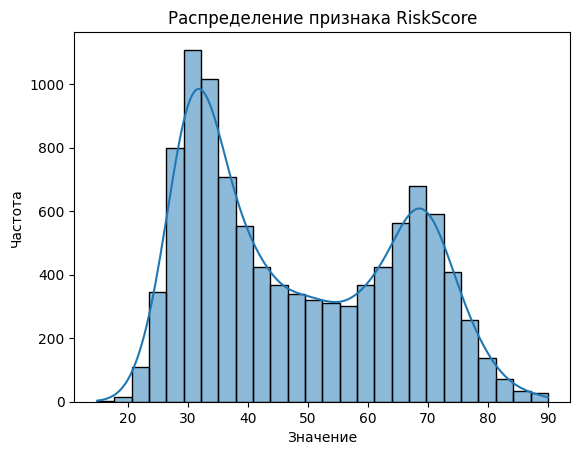

In [747]:
lower_bound = df['RiskScore'].quantile(0.01)
upper_bound = df['RiskScore'].quantile(0.99)

filtered_data = df[(df['RiskScore'] > lower_bound) & (df['RiskScore'] < upper_bound)]

distribution_plot(filtered_data, 'RiskScore')

df = filtered_data

[0.        1.        0.0525736]
Age                           485
AnnualIncome                  485
CreditScore                   485
LoanAmount                    485
LoanDuration                  485
MaritalStatus                 485
NumberOfDependents            485
HomeOwnershipStatus           485
MonthlyDebtPayments           485
CreditCardUtilizationRate     485
NumberOfOpenCreditLines       485
NumberOfCreditInquiries       485
DebtToIncomeRatio             485
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults          485
PaymentHistory                485
LengthOfCreditHistory         485
SavingsAccountBalance         485
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities              485
MonthlyIncome                 485
UtilityBillsPaymentHistory    485
JobTenure                     485
EmploymentStatus              485
EducationLevel                485
Experience                    485
NetWorth        

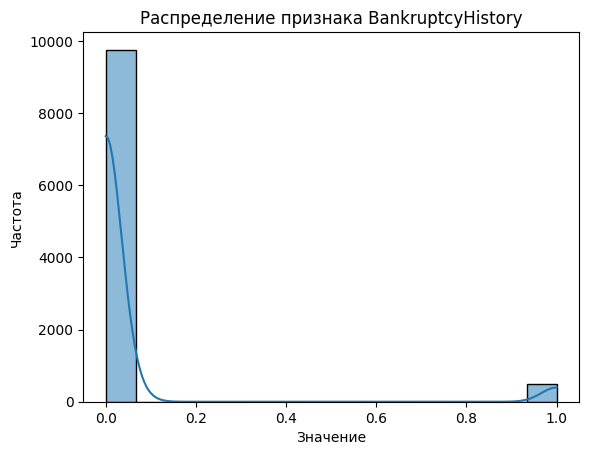

In [748]:
print(df['BankruptcyHistory'].unique())
print(df[(df['BankruptcyHistory'] != 1) & (df['BankruptcyHistory'] != 0)].count())
distribution_plot(df, 'BankruptcyHistory')
df = df[(df['BankruptcyHistory'] == 1) | (df['BankruptcyHistory'] == 0)]

[0. 1.]


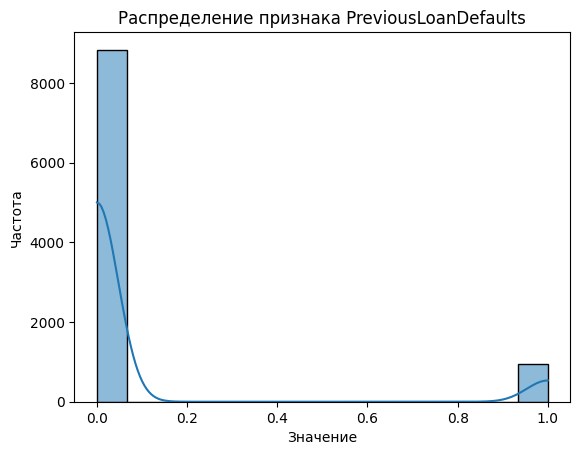

In [749]:
print(df['PreviousLoanDefaults'].unique())
distribution_plot(df, 'PreviousLoanDefaults')

In [750]:
Y = df.iloc[:,-1]
df.drop('RiskScore', axis=1, inplace=True)
Y

/tmp/ipykernel_34254/1961070448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('RiskScore', axis=1, inplace=True)


0        66.176500
1        28.495737
2        34.488104
3        36.910753
4        31.347091
           ...    
11010    41.553066
11011    28.051757
11012    32.440586
11013    67.673170
11014    75.292707
Name: RiskScore, Length: 9776, dtype: float64

In [751]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.select_dtypes(include=['float64']).columns.tolist()
columns_to_normalize.remove('LoanApproved')
columns_to_normalize.remove('BankruptcyHistory')
columns_to_normalize.remove('PreviousLoanDefaults')
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

/tmp/ipykernel_34254/1126394449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,-1.111578,-0.558536,-0.736413,-0.453969,0.267956,Divorced,-0.401738,Rent,1.090605,-0.831635,...,-0.426145,Employed,Associate,-1.206327,-0.257149,0.607104,0.532203,-0.420940,-0.257020,0.0
1,1.302344,0.348865,0.980249,-0.496380,-0.712042,Widowed,-0.401738,Mortgage,-0.667559,-0.683252,...,-1.334362,Employed,High School,1.353389,-0.274623,-1.208731,-1.106418,-0.416731,-0.521333,1.0
2,0.957498,1.450424,0.980249,0.306060,-0.712042,Married,-1.107596,Mortgage,-0.001287,0.999852,...,-0.880253,Employed,Bachelor,0.912059,0.269950,-0.972592,-0.875875,0.139257,-0.496857,1.0
3,-1.284001,-0.835501,0.963140,-0.385823,-0.222043,Married,-1.107596,Other,-0.782914,-0.603394,...,-0.880253,Employed,High School,-1.559391,-0.313133,-1.054562,-0.903016,-0.428661,-0.326707,1.0
4,1.302344,1.450424,0.980249,0.018560,-0.222043,Single,0.304120,Rent,0.030535,-0.071513,...,0.027964,Employed,Bachelor,1.176857,-0.323363,-0.951427,-1.149230,-0.238662,-0.518955,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,0.612652,-0.370220,-0.171797,-0.878730,-1.692040,Divorced,0.304120,Rent,-0.892302,-1.077832,...,-0.426145,Employed,Bachelor,0.470728,-0.069478,-0.464522,-0.363620,-0.429214,-0.487907,1.0
11011,-0.077040,1.450424,0.980249,-0.797897,0.757955,Divorced,2.421693,Own,-0.538282,-0.436376,...,-1.334362,Employed,Associate,-0.147134,-0.292807,-0.980154,-0.946760,-0.688430,-0.558836,1.0
11012,1.474767,1.450424,0.980249,-0.545045,-0.222043,Married,0.304120,Own,0.145890,1.207253,...,-0.426145,Employed,Associate,1.794719,0.029839,-1.117283,-0.969629,-0.516982,-0.533170,1.0
11013,-1.025367,-1.005086,-2.156509,0.770609,1.737952,Single,-0.401738,Own,0.297044,0.235940,...,-0.880253,Employed,Bachelor,-1.118061,-0.079918,2.601593,2.081071,0.526416,1.639061,0.0


In [752]:
categorial = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorial, drop_first=True)

bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9776 entries, 0 to 11014
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9776 non-null   float64
 1   AnnualIncome                    9776 non-null   float64
 2   CreditScore                     9776 non-null   float64
 3   LoanAmount                      9776 non-null   float64
 4   LoanDuration                    9776 non-null   float64
 5   NumberOfDependents              9776 non-null   float64
 6   MonthlyDebtPayments             9776 non-null   float64
 7   CreditCardUtilizationRate       9776 non-null   float64
 8   NumberOfOpenCreditLines         9776 non-null   float64
 9   NumberOfCreditInquiries         9776 non-null   float64
 10  DebtToIncomeRatio               9776 non-null   float64
 11  BankruptcyHistory               9776 non-null   float64
 12  PreviousLoanDefaults            9776 n

In [753]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

elastic_net_cv = ElasticNetCV(cv=5,
                              l1_ratio=[0.7, 0.9, 1.0],
                              alphas=[0.1, 1, 10],
                              random_state=52,
                              fit_intercept=True)

elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Коэффициенты признаков:", elastic_net_cv.coef_)

Mean Squared Error: 20.073581778937076
Коэффициенты признаков: [ 0.00000000e+00 -9.08590309e-02 -6.68810502e+00 -4.09584533e-01
  0.00000000e+00  0.00000000e+00 -2.83608239e-03  8.03992521e-01
  0.00000000e+00 -0.00000000e+00  2.06866536e+00  9.66840460e+00
  1.15224305e+00  0.00000000e+00 -6.29288842e-01 -0.00000000e+00
  0.00000000e+00 -1.34773862e+00  8.78595921e-02 -1.69671181e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.65129646e-01  5.71665218e-01
 -1.84548207e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.24363351e+00
  2.18076807e-01  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


In [754]:
coefs = elastic_net_cv.coef_
feature_names = df.columns
important_features = feature_names[coefs != 0]
important_features

Index(['AnnualIncome', 'CreditScore', 'LoanAmount', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved',
       'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed'],
      dtype='object')

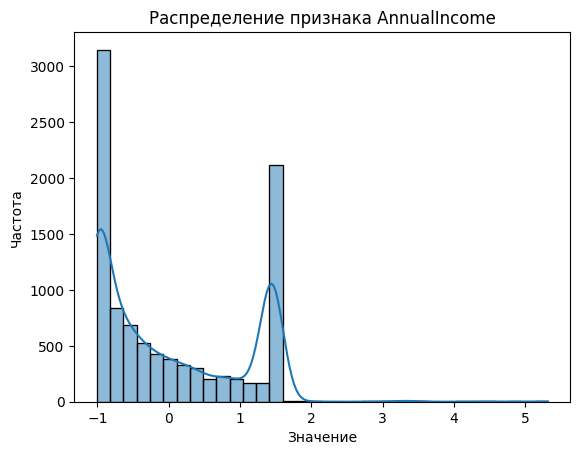

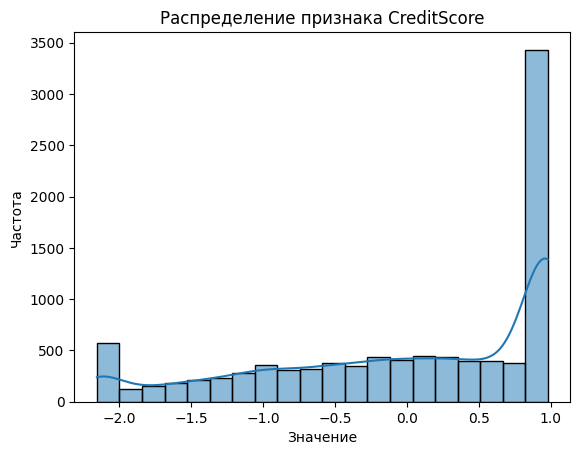

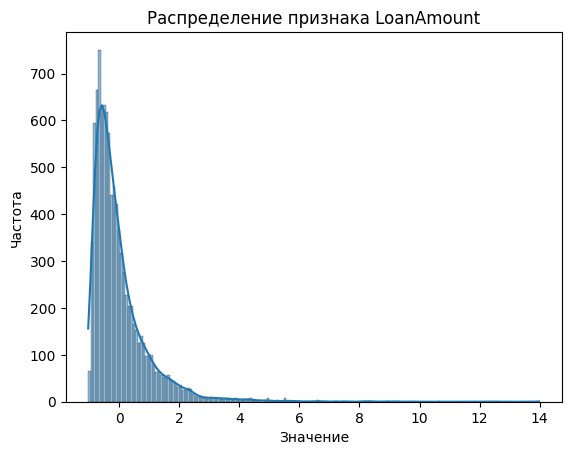

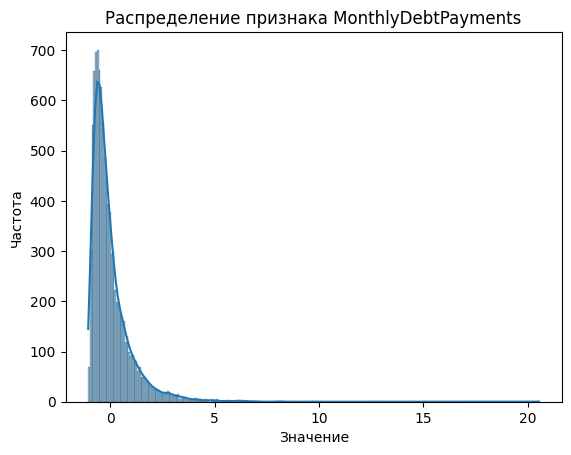

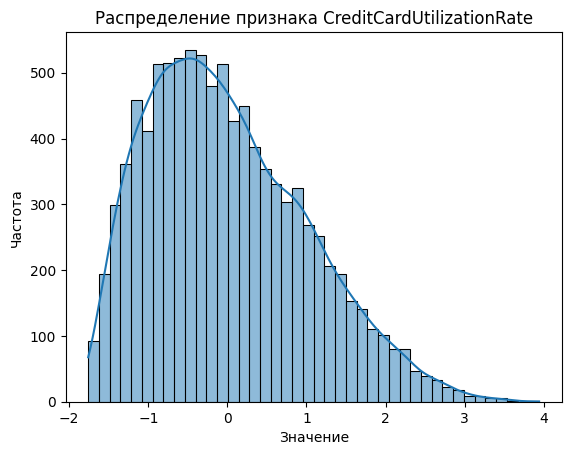

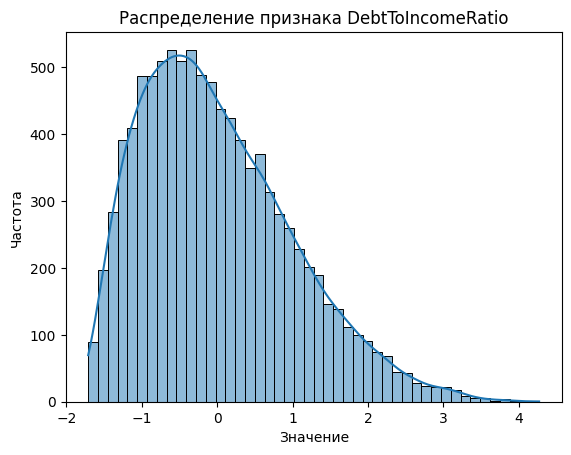

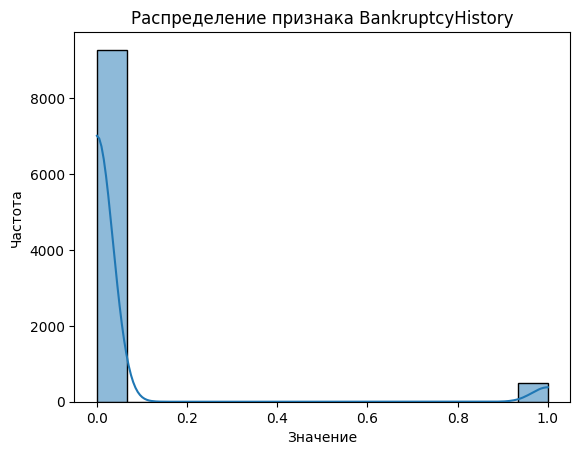

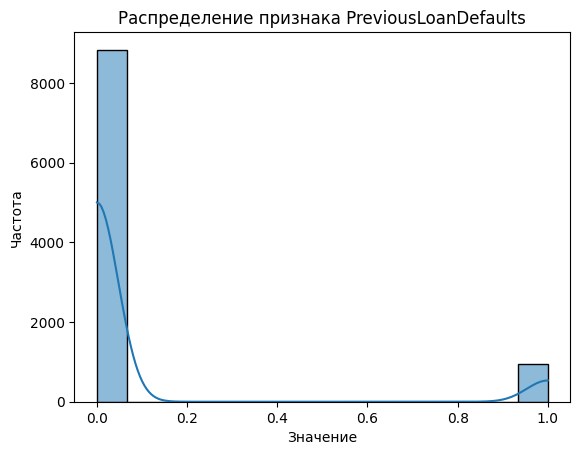

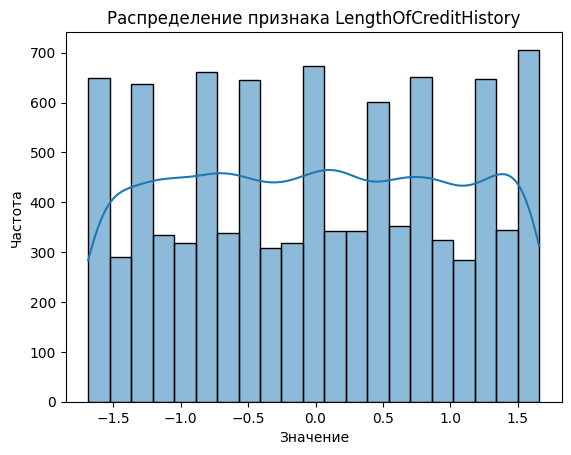

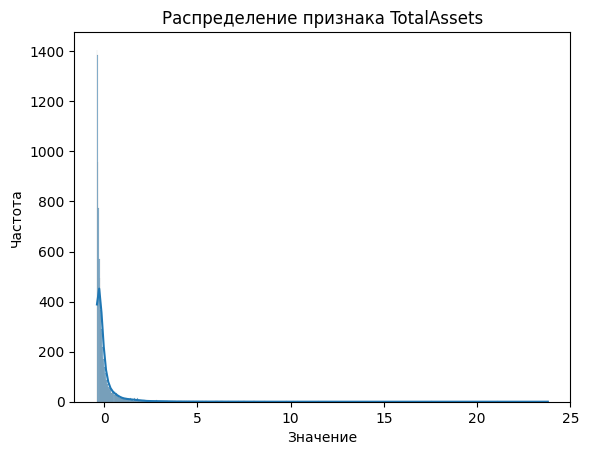

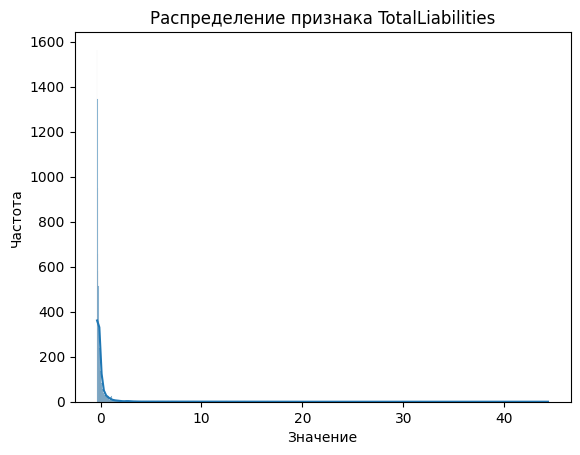

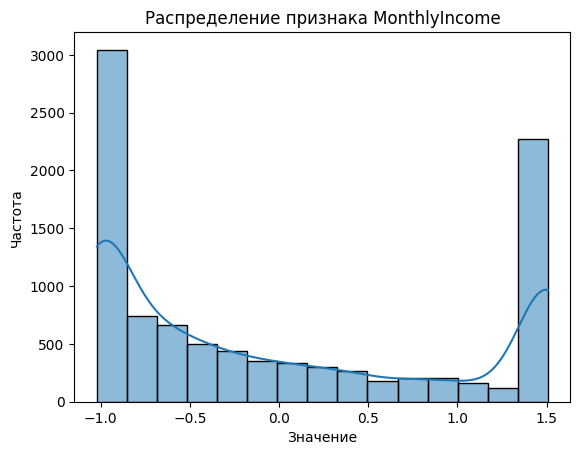

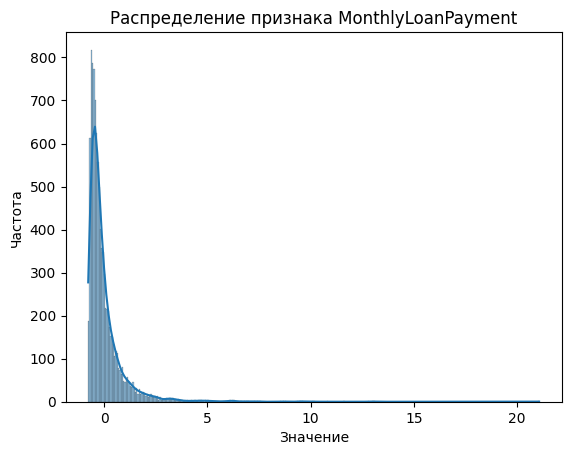

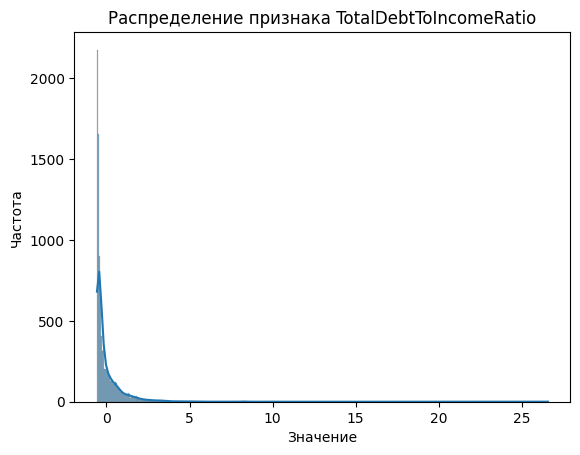

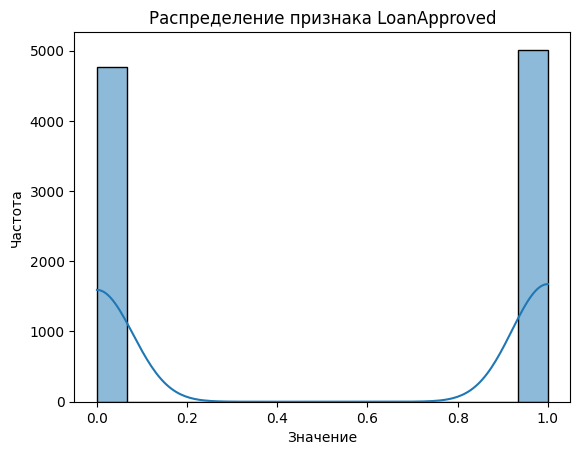

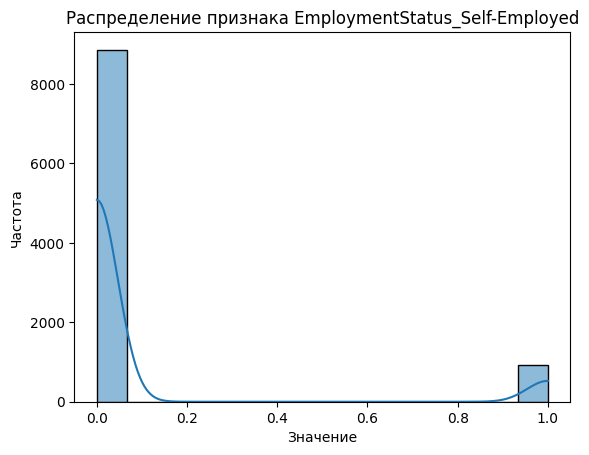

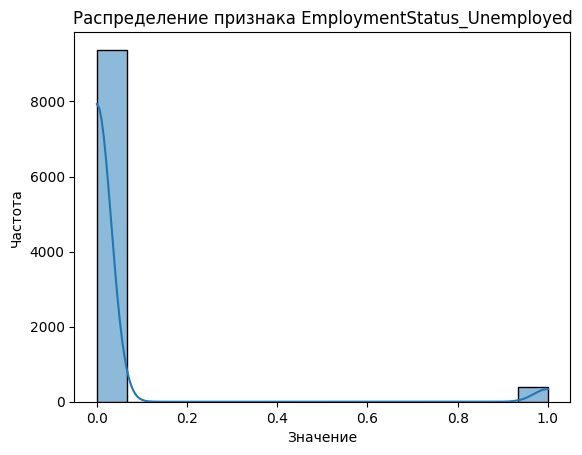

In [755]:
for feature in important_features:
    distribution_plot(df, feature)

In [756]:
df = df[important_features]
df

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyIncome,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,-0.558536,-0.736413,-0.453969,1.090605,-0.831635,-0.563307,0.0,0.0,-1.224369,-0.283785,-0.266904,-0.561048,-0.420940,-0.257020,0.0,0.0,0.0
1,0.348865,0.980249,-0.496380,-0.667559,-0.683252,-0.750309,0.0,0.0,-0.532601,-0.194225,-0.019204,0.372771,-0.416731,-0.521333,1.0,0.0,0.0
2,1.450424,0.980249,0.306060,-0.001287,0.999852,-1.516383,1.0,0.0,-0.417306,0.235138,-0.272302,1.506401,0.139257,-0.496857,1.0,0.0,0.0
3,-0.835501,0.963140,-0.385823,-0.782914,-0.603394,0.900728,0.0,0.0,0.620346,-0.363054,-0.322327,-0.846076,-0.428661,-0.326707,1.0,0.0,0.0
4,1.450424,0.980249,0.018560,0.030535,-0.071513,-1.255365,0.0,0.0,-0.763190,-0.319594,1.404878,1.506401,-0.238662,-0.518955,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,-0.370220,-0.171797,-0.878730,-0.892302,-1.077832,0.429486,0.0,0.0,0.043872,-0.084288,-0.234660,-0.367250,-0.429214,-0.487907,1.0,0.0,0.0
11011,1.450424,0.980249,-0.797897,-0.538282,-0.436376,-0.581864,0.0,0.0,-0.878485,-0.253341,-0.114570,1.506401,-0.688430,-0.558836,1.0,0.0,0.0
11012,1.450424,0.980249,-0.545045,0.145890,1.207253,-0.659356,0.0,0.0,-1.570253,-0.030667,-0.338047,1.506401,-0.516982,-0.533170,1.0,0.0,0.0
11013,-1.005086,-2.156509,0.770609,0.297044,0.235940,-0.516254,0.0,0.0,-1.570253,-0.136920,-0.332747,-1.020599,0.526416,1.639061,0.0,0.0,0.0


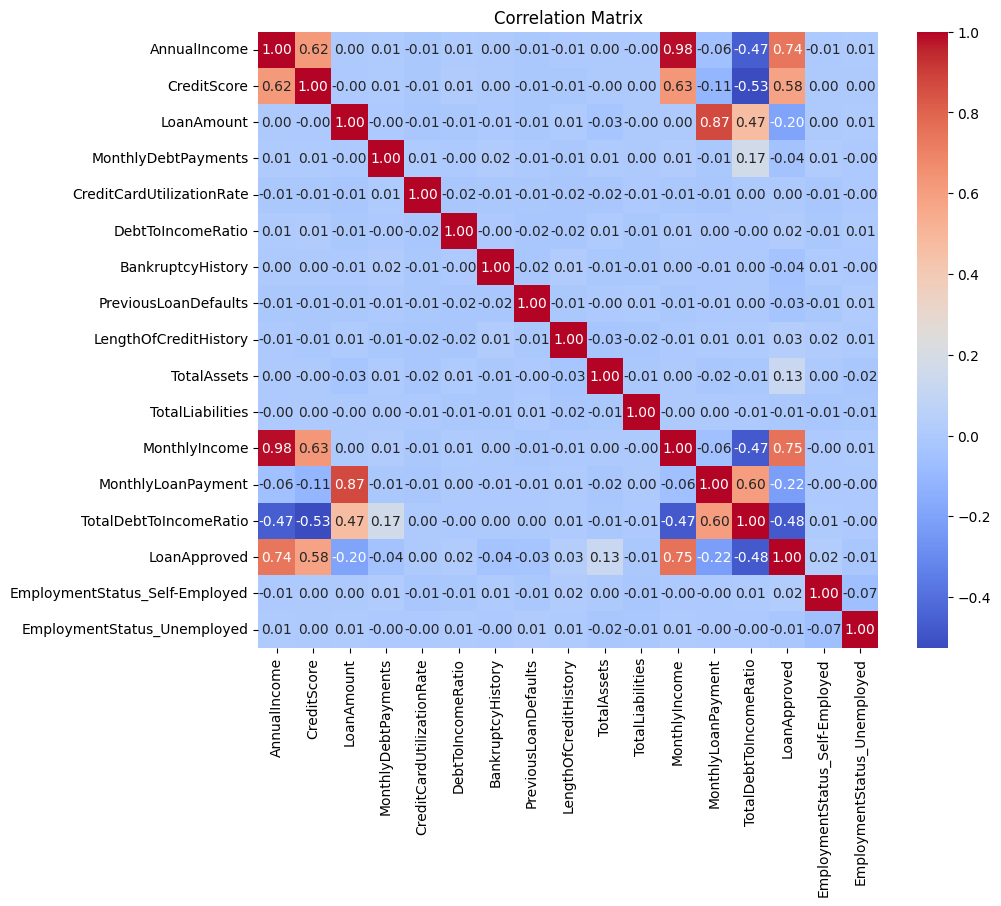

In [757]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [758]:
df.drop(['MonthlyIncome'], axis=1, inplace=True)
df

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,-0.558536,-0.736413,-0.453969,1.090605,-0.831635,-0.563307,0.0,0.0,-1.224369,-0.283785,-0.266904,-0.420940,-0.257020,0.0,0.0,0.0
1,0.348865,0.980249,-0.496380,-0.667559,-0.683252,-0.750309,0.0,0.0,-0.532601,-0.194225,-0.019204,-0.416731,-0.521333,1.0,0.0,0.0
2,1.450424,0.980249,0.306060,-0.001287,0.999852,-1.516383,1.0,0.0,-0.417306,0.235138,-0.272302,0.139257,-0.496857,1.0,0.0,0.0
3,-0.835501,0.963140,-0.385823,-0.782914,-0.603394,0.900728,0.0,0.0,0.620346,-0.363054,-0.322327,-0.428661,-0.326707,1.0,0.0,0.0
4,1.450424,0.980249,0.018560,0.030535,-0.071513,-1.255365,0.0,0.0,-0.763190,-0.319594,1.404878,-0.238662,-0.518955,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,-0.370220,-0.171797,-0.878730,-0.892302,-1.077832,0.429486,0.0,0.0,0.043872,-0.084288,-0.234660,-0.429214,-0.487907,1.0,0.0,0.0
11011,1.450424,0.980249,-0.797897,-0.538282,-0.436376,-0.581864,0.0,0.0,-0.878485,-0.253341,-0.114570,-0.688430,-0.558836,1.0,0.0,0.0
11012,1.450424,0.980249,-0.545045,0.145890,1.207253,-0.659356,0.0,0.0,-1.570253,-0.030667,-0.338047,-0.516982,-0.533170,1.0,0.0,0.0
11013,-1.005086,-2.156509,0.770609,0.297044,0.235940,-0.516254,0.0,0.0,-1.570253,-0.136920,-0.332747,0.526416,1.639061,0.0,0.0,0.0


In [759]:
# corr_matrix = df.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

In [760]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

ridge_cv = RidgeCV(cv = 5,
                   alphas=[0.1, 1, 10, 100],
                   fit_intercept=True)

ridge_cv.fit(X_train, y_train)

y_pred = ridge_cv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 19.37917423029777


In [761]:
from sklearn.preprocessing import StandardScaler

df_test = pd.read_csv('./test.csv')

df_test.drop('ApplicationDate', axis=1, inplace=True)

scaler = StandardScaler()
df_test[columns_to_normalize] = scaler.fit_transform(df_test[columns_to_normalize])

categorial = df_test.select_dtypes(include=['object']).columns.tolist()
df_test = pd.get_dummies(df_test, columns=categorial, drop_first=True)
bool_cols = df_test.select_dtypes(include=['bool']).columns.tolist()
df_test[bool_cols] = df_test[bool_cols].astype(float)

df_test = df_test[important_features]
df_test.drop(['MonthlyIncome'], axis=1, inplace=True)

In [762]:
df_test

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,0.638663,0.971893,-0.546054,-0.336550,-1.300770,1.279373,0,0,-0.061508,-0.421227,-0.275714,-0.535452,-0.510505,1,0.0,0.0
1,-0.596647,-0.025652,1.190827,-0.612864,-1.320560,1.335073,0,0,1.425861,0.352588,-0.326070,0.762163,-0.073543,0,0.0,0.0
2,1.444370,0.507128,-0.465971,-0.150339,0.298636,-1.509054,0,0,-0.747987,-0.402636,-0.409819,-0.481443,-0.516557,1,0.0,0.0
3,1.444370,0.971893,0.620613,0.045884,1.639138,0.177055,0,0,-0.747987,-0.372335,0.194684,0.322696,-0.463079,1,1.0,0.0
4,1.444370,-0.036987,0.728809,-0.877165,0.956348,-0.394275,0,0,-1.091226,0.654890,-0.432463,0.263987,-0.486155,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.444370,0.971893,-0.606023,-0.220418,-1.392589,1.065326,0,0,-0.404748,-0.382946,-0.382562,-0.576237,-0.523852,1,1.0,0.0
4996,-0.506793,-0.603774,0.642497,-0.895185,-1.426408,0.099391,0,0,0.510557,-0.379088,-0.348610,0.469251,-0.235520,0,0.0,0.0
4997,-1.027257,-1.272583,0.078546,-0.510748,0.752251,-1.532813,0,0,0.968209,0.595985,-0.373385,-0.104318,0.494810,0,0.0,0.0
4998,-0.303400,0.971893,-0.069980,-0.662921,-0.921494,-1.477422,0,1,-0.290335,-0.182445,5.099897,-0.392635,-0.457427,0,1.0,0.0


In [773]:
prediction = ridge_cv.predict(df_test)
df_prediction = pd.DataFrame(prediction, columns=['RiskScore'])
df_prediction = df_prediction.reset_index()
df_prediction.rename(columns={'index': 'ID'}, inplace=True)
df_prediction.to_csv('submission.csv', index=False)
df_prediction

,ID,RiskScore
0,0,32.516926
1,1,57.258727
2,2,30.217080
3,3,33.872223
4,4,35.112544
...,...,...
4995,4995,33.584782
4996,4996,60.014356
4997,4997,63.331346
4998,4998,53.648851
